In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
# 第一列为标签值，其他列为特征
data = [[83.0, 234.289, 235.6, 159.0, 107.608, 1947., 60.323],
        [88.5, 259.426, 232.5, 145.6, 108.632, 1948., 61.122],
        [88.2, 258.054, 368.2, 161.6, 109.773, 1949., 60.171],
        [89.5, 284.599, 335.1, 165.0, 110.929, 1950., 61.187],
        [96.2, 328.975, 209.9, 309.9, 112.075, 1951., 63.221],
        [98.1, 346.999, 193.2, 359.4, 113.27, 1952., 63.639],
        [99.0, 365.385, 187., 354.7, 115.094, 1953., 64.989],
        [100.0, 363.112, 357.8, 335.0, 116.219, 1954., 63.761],
        [101.2, 397.469, 290.4, 304.8, 117.388, 1955., 66.019],
        [104.6, 419.18, 282.2, 285.7, 118.734, 1956., 67.857],
        [108.4, 442.769, 293.6, 279.8, 120.445, 1957., 68.169],
        [110.8, 444.546, 468.1, 263.7, 121.95, 1958., 66.513],
        [112.6, 482.704, 381.3, 255.2, 123.366, 1959., 68.655],
        [114.2, 502.601, 393.1, 251.4, 125.368, 1960., 69.564],
        [115.7, 518.173, 480.6, 257.2, 127.852, 1961., 69.331],
        [116.9, 554.894, 400.7, 282.7, 130.081, 1962., 70.551]]
data = np.array(data)
x_data = data[:, 1:]
y_data = data[:, 0]
print(x_data)
print(y_data)

[[ 234.289  235.6    159.     107.608 1947.      60.323]
 [ 259.426  232.5    145.6    108.632 1948.      61.122]
 [ 258.054  368.2    161.6    109.773 1949.      60.171]
 [ 284.599  335.1    165.     110.929 1950.      61.187]
 [ 328.975  209.9    309.9    112.075 1951.      63.221]
 [ 346.999  193.2    359.4    113.27  1952.      63.639]
 [ 365.385  187.     354.7    115.094 1953.      64.989]
 [ 363.112  357.8    335.     116.219 1954.      63.761]
 [ 397.469  290.4    304.8    117.388 1955.      66.019]
 [ 419.18   282.2    285.7    118.734 1956.      67.857]
 [ 442.769  293.6    279.8    120.445 1957.      68.169]
 [ 444.546  468.1    263.7    121.95  1958.      66.513]
 [ 482.704  381.3    255.2    123.366 1959.      68.655]
 [ 502.601  393.1    251.4    125.368 1960.      69.564]
 [ 518.173  480.6    257.2    127.852 1961.      69.331]
 [ 554.894  400.7    282.7    130.081 1962.      70.551]]
[ 83.   88.5  88.2  89.5  96.2  98.1  99.  100.  101.2 104.6 108.4 110.8
 112.6 114.2 1

In [6]:
# 创建模型，开始训练

# 先随便给一个alpha系数
alpha = 0.5

# 岭回归模型
model = linear_model.Ridge(alpha)
model.fit(x_data, y_data)

# 返回模型的估计系数
print(model.coef_)
# 评分
model.score(x_data,y_data)

[ 0.21101482  0.02466526  0.00766465 -1.47597778 -0.33445813 -0.04156678]


0.9924332890494386

[ 83.66929529  86.91533491  88.11651437  90.84462201  96.12065685
  97.77585169  98.38386488 100.02217238 103.22436339 105.05953218
 107.40029832 109.46898906 112.80131943 113.93465583 115.43214216
 117.73038725]


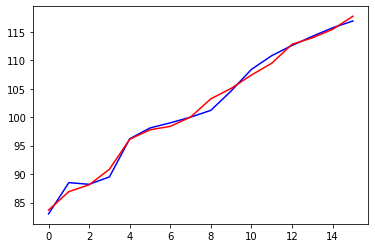

In [11]:
print(model.predict(x_data))
xaxis = np.arange(0,16)
predict_y = model.predict(x_data)
plt.plot(xaxis,y_data,'b',label = "original")
plt.plot(xaxis,predict_y,'r',label = "predict")

In [7]:
# 创建模型，开始训练

# 生成50个alpha系数
alphas = np.linspace(0.001, 1, 50)

# 岭回归+交叉验证的模型
cv_model = linear_model.RidgeCV(alphas, store_cv_values=True)
cv_model.fit(x_data, y_data)

# 最佳的alpha
best_alpha = cv_model.alpha_
print(best_alpha)
# 交叉验证的结果
print(cv_model.cv_values_)
print(cv_model.cv_values_.shape)
# 结果中(16, 50) 指数据被拆分为16份，做了16次训练和验证，每次训练集15份、验证集1份，每次分别使用了50个alpha值做训练

0.40875510204081633
[[1.34072103e+00 1.27561414e+00 1.23262714e+00 1.20413381e+00
  1.18561728e+00 1.17423737e+00 1.16812114e+00 1.16598468e+00
  1.16691902e+00 1.17026299e+00 1.17552433e+00 1.18232917e+00
  1.19038855e+00 1.19947569e+00 1.20941021e+00 1.22004686e+00
  1.23126748e+00 1.24297495e+00 1.25508881e+00 1.26754186e+00
  1.28027755e+00 1.29324804e+00 1.30641258e+00 1.31973631e+00
  1.33318924e+00 1.34674546e+00 1.36038253e+00 1.37408090e+00
  1.38782353e+00 1.40159548e+00 1.41538367e+00 1.42917656e+00
  1.44296401e+00 1.45673705e+00 1.47048777e+00 1.48420916e+00
  1.49789500e+00 1.51153980e+00 1.52513868e+00 1.53868732e+00
  1.55218188e+00 1.56561897e+00 1.57899559e+00 1.59230908e+00
  1.60555710e+00 1.61873759e+00 1.63184874e+00 1.64488896e+00
  1.65785690e+00 1.67075134e+00]
 [6.42617451e+00 6.43602265e+00 6.44595583e+00 6.45587623e+00
  6.46572381e+00 6.47546064e+00 6.48506236e+00 6.49451335e+00
  6.50380373e+00 6.51292752e+00 6.52188147e+00 6.53066420e+00
  6.53927571e+00 

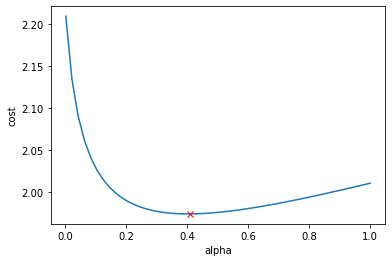

In [8]:
# 画针对所有的alphas值计算出的损失值
plt.plot(alphas, cv_model.cv_values_.mean(axis=0))
# 画最佳点
min_cost = min(cv_model.cv_values_.mean(axis=0))
plt.plot(best_alpha, min_cost, "rx")

plt.xlabel('alpha')
plt.ylabel('cost')
plt.show()